# Home work 1 practicable 
### mohammad moeini : 4003111050

## Question 8
### Data exploration

#### cell 1
در ابتدا دیتاست آریس را فراخوانی کردم و با نگاهی اولیه به اجزای دیتاست 
فیچر ها و کلاس ها دبد کلی نسبت به دیتا ست بدست آوردم
### cell 2
 بوسیله متدهای پانداس یک انالیز اولیه از هر فیچر بدس می آوریم
describe() & info()
### cell 3
(matplotlib & seaborn) در مرحله بعد با کمک کتابخانه های
موقعیت و وضعیت فیچر ها را مقایسه و نمایش میدهیم
####
در دو پلات اول وضعیت طول و عرض گلبرگ و کاسبرگ ها را نسبت به هم مقایسه کردیم
آن را نمایش دادم(scatterr plot)و با  
####
سپس همبسگی فیچر ها را به کمک پانداس و سیبورن نمایش دادیم
seaborn.heatmap(data_frame.corr(), annot=True)

و در ساب پلات چهارم تعداد نمونه ها از هر کلاس را نمایش دادیم
### cell 4
seaborn.pairplot() در سلول بعدی با استفاده از 
یک شبکه از نمودارهای پراکندگی برای هر جفت متغیر عددی
این تابع به خصوص برای بررسی روابط بین چندین متغیر به یکدیگر استفاده می‌شود.
 محورهای قطری شبکه نمودارهای توزیع فردی را نشان می‌دهند

In [50]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
print(dict.keys(iris))
print(iris['feature_names'])
print(iris['target_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [51]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


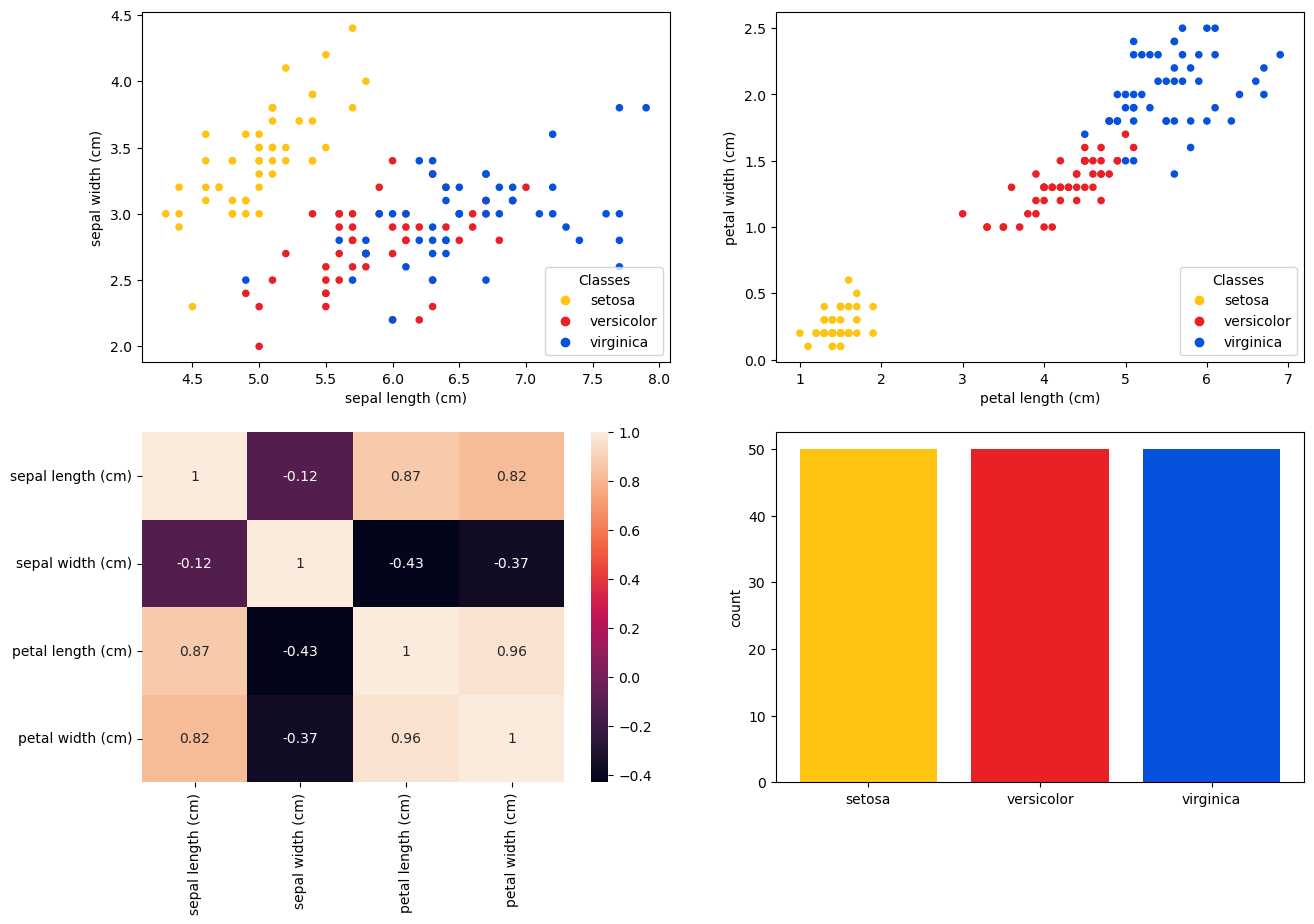

In [52]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

cmap = ListedColormap(['#FFC312', '#EA2027', '#0652DD'])
X = iris.data
y = iris.target

fig = plt.figure(figsize=(15, 10), dpi=100)

ax1 = fig.add_subplot(221)
scatter1 = ax1.scatter(X[:,0], X[:,1], c=y, cmap=cmap, s=20)
ax1.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax1.legend(scatter1.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

ax2 = fig.add_subplot(222)
scatter2 = ax2.scatter(X[:,2], X[:,3], c=y, cmap=cmap, s=20)
ax2.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
ax2.legend(scatter2.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

ax3 = fig.add_subplot(223)
df_features = iris_df.loc[:,:'petal width (cm)']
iris_corr = df_features.corr()
sns.heatmap(iris_corr, annot=True)

ax4 = fig.add_subplot(224)
target_count = iris_df['target'].value_counts().tolist()
bar1 = ax4.bar(iris.target_names, target_count, color=cmap.colors)
ax4.set(ylabel='count')

plt.show()

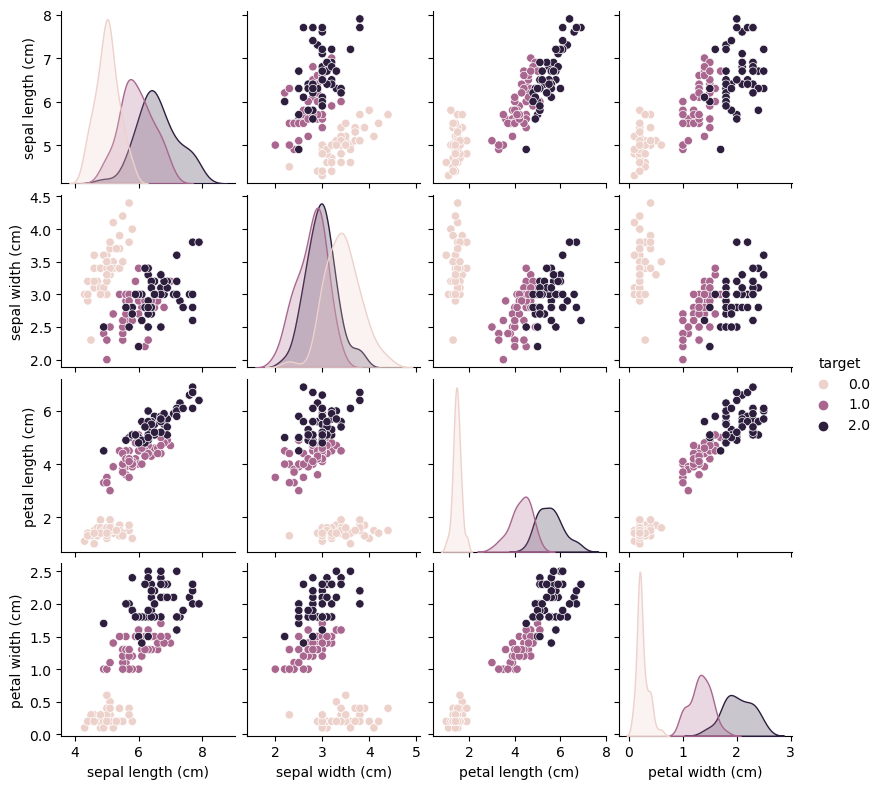

In [53]:

sns.pairplot(iris_df, hue='target', height=2)

## Question 9
### Noramlization

### min-max 
زمانی که داده ها از توزیع گاوسی یا نرمال پیروی نمی کنند
نرمال سازی مین مکس ترجیح داده می شود
این برای عادی سازی الگوریتم هایی که از هیچ توزیعی پیروی نمی کنند
مانند همسایه های نزدیک و  شبکه های عصبی مورد علاقه است
باید توجه کرد که نرمال سازی مین مکس تحت تأثیر اقلام پرت است

### standardization (Z-score)
استانداردسازی در مواردی که داده ها از توزیع گاوسی پیروی می کنند می تواند مفید باشد
با این حال این لزوماً درست نیست علاوه بر این بر خلاف عادی سازی استانداردسازی محدوده مرزی ندارد
این به این معنی است که حتی اگر داده‌های پرت وجود داشته باشد
تحت تأثیر استانداردسازی قرار نخواهند گرفت

### log scaling
در صورتی که یک مجموعه داده دارای مقادیر پرت بزرگ باشد، مقیاس بندی لگاریتمی ترجیح داده می شود


In [54]:
# Min_Max normalization 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = iris.data[:10,]
scaler.fit(data)
print(scaler.data_max_)
print(scaler.data_min_)
print('Befor normalize:\n', data)
print('After normalize:\n', scaler.transform(data))

[5.4 3.9 1.7 0.4]
[4.4 2.9 1.3 0.1]
Befor normalize:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
After normalize:
 [[0.7        0.6        0.25       0.33333333]
 [0.5        0.1        0.25       0.33333333]
 [0.3        0.3        0.         0.33333333]
 [0.2        0.2        0.5        0.33333333]
 [0.6        0.7        0.25       0.33333333]
 [1.         1.         1.         1.        ]
 [0.2        0.5        0.25       0.66666667]
 [0.6        0.5        0.5        0.33333333]
 [0.         0.         0.25       0.33333333]
 [0.5        0.2        0.5        0.        ]]


In [55]:
# standardization normalization (Z-score)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = iris.data[:10,]

print(scaler.fit(data))
print(scaler.mean_)
print('Befor Z-score:\n', data)
print('After Z-score\n', scaler.transform(data))

StandardScaler()
[4.86 3.31 1.45 0.22]
Befor Z-score:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
After Z-score
 [[ 0.86828953  0.65207831 -0.48795004 -0.26726124]
 [ 0.14471492 -1.06391725 -0.48795004 -0.26726124]
 [-0.57885968 -0.37751902 -1.46385011 -0.26726124]
 [-0.94064699 -0.72071813  0.48795004 -0.26726124]
 [ 0.50650222  0.99527742 -0.48795004 -0.26726124]
 [ 1.95365143  2.02487476  2.43975018  2.40535118]
 [-0.94064699  0.3088792  -0.48795004  1.06904497]
 [ 0.50650222  0.3088792   0.48795004 -0.26726124]
 [-1.66422159 -1.40711636 -0.48795004 -0.26726124]
 [ 0.14471492 -0.72071813  0.48795004 -1.60356745]]


In [56]:
# Log scaling 
from sklearn.preprocessing import FunctionTransformer
import numpy as np

transformer = FunctionTransformer(np.log1p)
data = iris.data[:10,]
X = np.array(data)
t1 = transformer.transform(X)
print('Befor:\n', data)
print('After:\n', t1)

Befor:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
After:
 [[1.80828877 1.5040774  0.87546874 0.18232156]
 [1.77495235 1.38629436 0.87546874 0.18232156]
 [1.74046617 1.43508453 0.83290912 0.18232156]
 [1.7227666  1.41098697 0.91629073 0.18232156]
 [1.79175947 1.5260563  0.87546874 0.18232156]
 [1.85629799 1.58923521 0.99325177 0.33647224]
 [1.7227666  1.48160454 0.87546874 0.26236426]
 [1.79175947 1.48160454 0.91629073 0.18232156]
 [1.68639895 1.36097655 0.87546874 0.18232156]
 [1.77495235 1.41098697 0.91629073 0.09531018]]


## Question 10
### wine dataset and KNN

### KNN 
#### 
مقدار کا را تعریف میکنیم knn با تعریف کلاس 
####
در تابع فیت داده های آموزش و تارگت های آموزش را تعریف میکنیم
#### 
لیستی از داده های تست دریافت میکنیم predict در متد
#### 
در متد پروتکتد پردیکت فاصله هر نمونه با کل داده های آموزش حساب میکنیم و در منغیر فاصله ها میریزیم
####
میریزیم k_indicesسپس فاصله ها را بر اساس ایندکس سورت میکنیم و کا تای کوچکتر را درون متغیر  
####
سپس به ازای هر کا تا نزدیک کلاس هایشان را درون لیست دیگری میریزیم
####
و در آخر کلاسی که بیشترین رای را دارد بر میگردانیم
### result of test Accuracy betwine my KNN and sklearn.neighbors.KNeighborsClassifier
#### 
با استفاده از الگوریتم فرام اسکرچ خودم بدون نرمال سازی حداکثر به 80 درصد دقت رسیدم و بعد از نرمال سازی داده ها با سه روش مین-مکس و استاندار سازی و مقایسبندی لگاریتمی دقت افت زیادی پیدا کرد
####
 و نرمال سازی مین-مکس به دقت 1 هم میرسیمKNeighborsClassifier در حالی که با 



In [182]:
# K nearest neighbor 
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predicte(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # get the closests k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labls = [self.y_train[i] for i in k_indices]
        # majority voye
        most_common =  Counter(k_nearest_labls).most_common()
        return most_common[0][0]

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum(x1-x2)**2) 
    return distance

In [58]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print(dict.keys(wine))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [59]:
wine_df = pd.DataFrame(data=np.c_[wine.data, wine.target], columns=wine.feature_names + ["target"])
# wine_df.info() # There is no deleted data
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<AxesSubplot:>

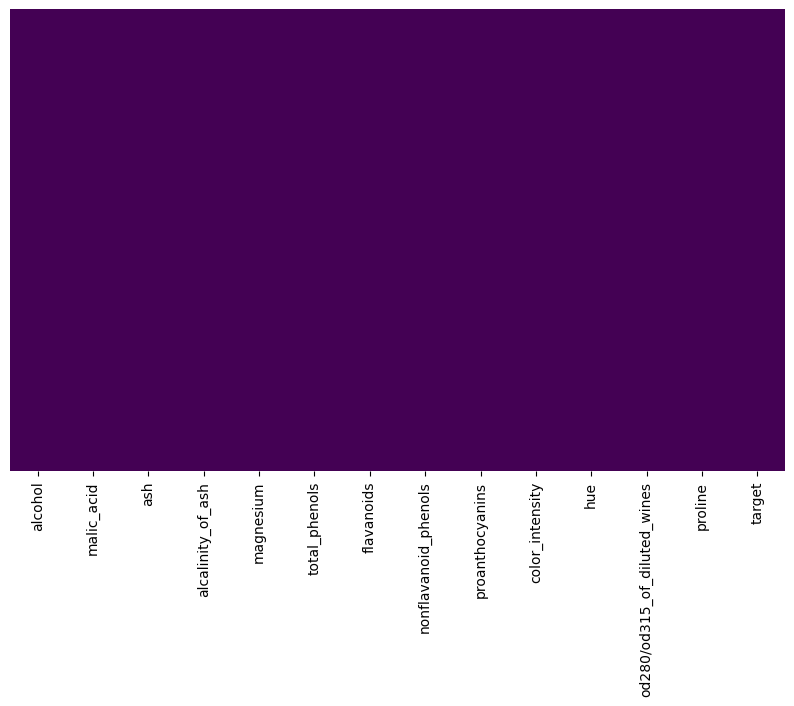

In [189]:
plt.figure(figsize=(10, 6))
sns.heatmap(wine_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
# There is no deleted data

In [61]:
# Min_Max normalization 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_wine)
mix_data = scaler.transform(X_wine)

In [62]:
# standardization normalization (Z-score)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_wine)
std_data = scaler.transform(X_wine)

In [ ]:
# Log scaling 
from sklearn.preprocessing import FunctionTransformer
import numpy as np

transformer = FunctionTransformer(np.log1p)
data = np.array(X_wine)
log_data = transformer.transform(data)

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.2)

knn = KNN(11)

knn.fit(X_train, y_train)
predictions = knn.predicte(X_test)

acc = np.sum(predictions == y_test) / len(y_test )
print("Accuracy:", acc)

Accuracy: 0.8055555555555556


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(mix_data, y_wine, test_size=0.2)

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


c:\Users\momoein\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
